In [78]:
! pip install pandas
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [79]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_excel("Online Retail.xlsx") 
df.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [149]:
customer_counts= df.groupby('CustomerID').size()
customer_counts.sort_values()

CustomerID
14576.0       1
16323.0       1
17102.0       1
18141.0       1
17956.0       1
           ... 
14606.0    3949
14096.0    5411
12748.0    6111
14911.0    7632
17841.0    8613
Length: 4372, dtype: int64

Finding missing values:

In [81]:
missing_value = df[df.isna().any(axis=1)]
missing_value

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Fill missing data in CustomerID with the ID in the previous row and drop all rows containing null Description. Also, make sure the quantity is a valid number

In [82]:
df['CustomerID'] = df['CustomerID'].fillna(method='ffill')
df = df.dropna(subset=['Description'])
df = df.reset_index(drop=True)
df["Quantity"]=df["Quantity"].abs()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Verify if the Quantity and Unit price does not contain any invalid data

In [83]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Check the result
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 539392 entries, 0 to 540454
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539392 non-null  object        
 1   StockCode    539392 non-null  object        
 2   Description  539392 non-null  object        
 3   Quantity     539392 non-null  int64         
 4   InvoiceDate  539392 non-null  datetime64[ns]
 5   UnitPrice    539392 non-null  float64       
 6   CustomerID   539392 non-null  float64       
 7   Country      539392 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.0+ MB


In [84]:
# Convert 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df


C:\Users\ishan\AppData\Local\Temp\ipykernel_472\1624880024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Now the dataset is clean!
## Products contributing most to revenue.

In [ ]:
#df = pd.read_excel("Online Retail.xlsx")
# Calculate revenue properly
high_seller = df.groupby('Description').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).sort_values(ascending=False).head()
high_seller

Description
PAPER CRAFT , LITTLE BIRDIE    336939.20
AMAZON FEE                     249042.68
Manual                         224897.28
DOTCOM POSTAGE                 206252.06
REGENCY CAKESTAND 3 TIER       184207.29
dtype: float64


In [86]:
amazon_fee_data = df[df['Description'] == 'AMAZON FEE']
print(amazon_fee_data)

       InvoiceNo  StockCode Description  Quantity         InvoiceDate  \
14454    C537600  AMAZONFEE  AMAZON FEE         1 2010-12-07 12:41:00   
14956    C537630  AMAZONFEE  AMAZON FEE         1 2010-12-07 15:04:00   
14957     537632  AMAZONFEE  AMAZON FEE         1 2010-12-07 15:08:00   
16172    C537644  AMAZONFEE  AMAZON FEE         1 2010-12-07 15:34:00   
16253    C537647  AMAZONFEE  AMAZON FEE         1 2010-12-07 15:41:00   
16296    C537651  AMAZONFEE  AMAZON FEE         1 2010-12-07 15:49:00   
16297    C537652  AMAZONFEE  AMAZON FEE         1 2010-12-07 15:51:00   
43566    C540117  AMAZONFEE  AMAZON FEE         1 2011-01-05 09:55:00   
43567    C540118  AMAZONFEE  AMAZON FEE         1 2011-01-05 09:57:00   
96546    C544587  AMAZONFEE  AMAZON FEE         1 2011-02-21 15:07:00   
96547    C544589  AMAZONFEE  AMAZON FEE         1 2011-02-21 15:11:00   
124396   C546987  AMAZONFEE  AMAZON FEE         1 2011-03-18 12:56:00   
124442   C546989  AMAZONFEE  AMAZON FEE         1 2

In [148]:
# Filter out rows where the Description is 'AMAZON FEE'
df_filtered = df[df['Description'] != 'AMAZON FEE']

# Recalculate high sellers after excluding Amazon Fee
high_seller_filtered = df_filtered.groupby('Description').apply(
    lambda x: (x['Quantity'] * x['UnitPrice']).sum()
).sort_values(ascending=False).head()

print(high_seller_filtered)


Description
PAPER CRAFT , LITTLE BIRDIE       336939.20
Manual                            224897.28
DOTCOM POSTAGE                    206252.06
REGENCY CAKESTAND 3 TIER          184207.29
MEDIUM CERAMIC TOP STORAGE JAR    159180.56
dtype: float64


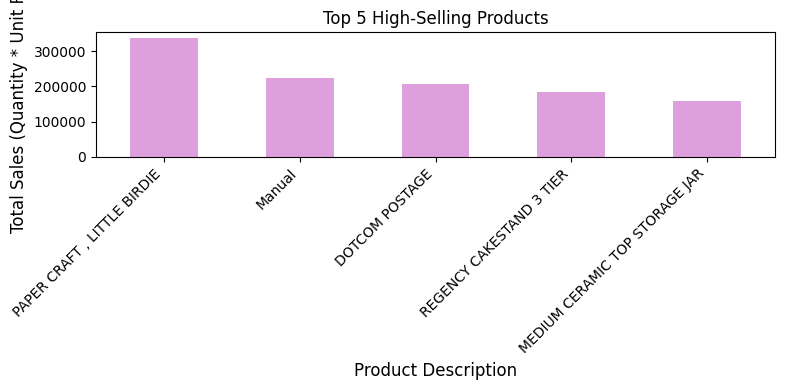

In [179]:
plt.figure(figsize=(8, 4))
high_seller_filtered.plot(kind='bar', color='plum', title='Top 5 High-Selling Products', legend=False)

# Add labels and customize the chart
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Total Sales (Quantity * Unit Price)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Show the chart
plt.show()

## List of countries buying the most and the least number of items-

In [163]:
highest_ordering_country= df.groupby('Country')['Quantity'].sum()
highest_ordering_country=highest_ordering_country.sort_values(ascending=False).head()
highest_ordering_country

Country
United Kingdom    4925423
Netherlands        201170
EIRE               151983
Germany            121076
France             113727
Name: Quantity, dtype: int64

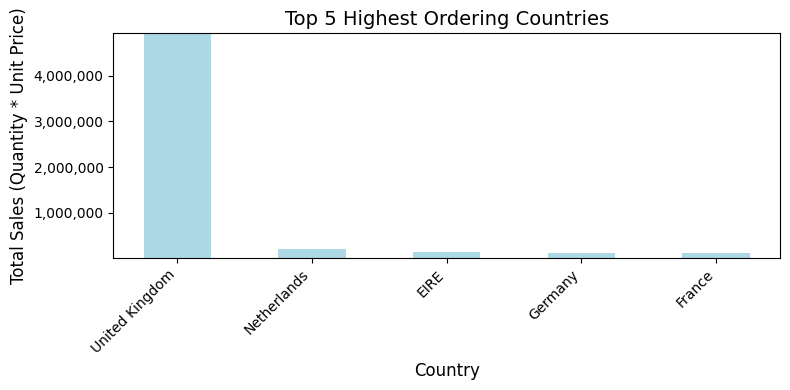

In [180]:
import matplotlib.ticker as mtick

# Plot Top 5 Highest Ordering Countries using Matplotlib
plt.figure(figsize=(8, 4))

# Use plt.bar() for more control
plt.bar(highest_ordering_country.index, highest_ordering_country.values, color='lightblue', width=0.5)

# Add title and labels
plt.title('Top 5 Highest Ordering Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales (Quantity * Unit Price)', fontsize=12)

# Customize y-axis
plt.ylim(10000, max(highest_ordering_country.values) + 1000)  # Set range for y-axis
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Format with commas

# Customize x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the chart
plt.show()


In [152]:
lowest_ordering_country=highest_ordering_country.sort_values(ascending=True).head(5)
lowest_ordering_country

Country
Saudi Arabia     85
RSA             351
Brazil          356
Bahrain         368
Lebanon         386
Name: Quantity, dtype: int64

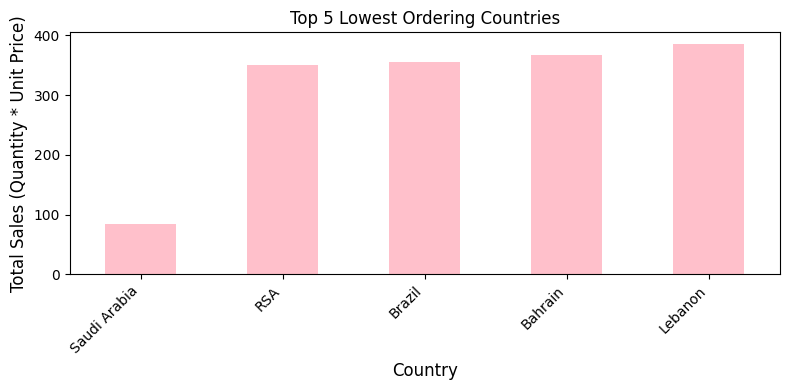

In [182]:
# Plot the top 5 lowest ordering countries
plt.figure(figsize=(8, 4))
lowest_ordering_country.plot(kind='bar', color='pink', title='Top 5 Lowest Ordering Countries', legend=False)

# Add labels and customize the chart
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales (Quantity * Unit Price)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Show the chart
plt.show()


In [99]:
# Calculate total spend (Quantity * UnitPrice) for each customer
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

# Group by 'CustomerID' and sum the 'TotalSpend' for each customer
customer_spend = df.groupby('CustomerID')['TotalSpend'].sum().reset_index()

# View the result
print(customer_spend.head())
 

   CustomerID  TotalSpend
0     12346.0   154367.20
1     12347.0     4310.00
2     12348.0     3366.27
3     12349.0     1757.55
4     12350.0      334.40


C:\Users\ishan\AppData\Local\Temp\ipykernel_472\1804483573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSpend'] = df['Quantity'] * df['UnitPrice']


In [175]:
# Calculate the 80th percentile (for High-value) and 20th percentile (for Low-value)
# high_value_threshold = customer_spend['TotalSpend'].quantile(0.80)
# low_value_threshold = customer_spend['TotalSpend'].quantile(0.20)

# Categorize customers based on the thresholds
# customer_spend['Category'] = customer_spend['TotalSpend'].apply(
#     lambda x: 'High-value' if x >= high_value_threshold else ('Low-value' if x <= low_value_threshold else 'Potential')
# )
customer_spend['Category'] = customer_spend['TotalSpend'].apply(
    lambda x: 'High-value' if x > 5000 else ('Low-value' if x < 500 else 'Potential')
)

# View the result
customer_spend.head(10)


,CustomerID,TotalSpend,Category
0,12346.0,154367.20,High-value
1,12347.0,4310.00,Potential
2,12348.0,3366.27,Potential
3,12349.0,1757.55,Potential
4,12350.0,334.40,Low-value
5,12352.0,5201.19,High-value
6,12353.0,89.00,Low-value
7,12354.0,1079.40,Potential
8,12355.0,459.40,Low-value
9,12356.0,2811.43,Potential


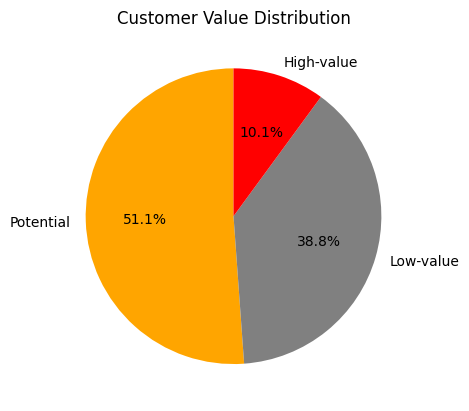

In [122]:
# Count the number of customers in each category
category_counts = customer_spend['Category'].value_counts()

# Plot a pie chart showing the percentage of each category
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'grey', 'red'], startangle=90, legend=False)

# Add title
plt.title('Customer Value Distribution')

# Show the pie chart
plt.ylabel('')  # To hide the y-axis label
plt.show()
